In this training, we will work with EEG data comprising 20 channels from 1,000 participants. Since high-dimensional data can hinder the efficiency of machine learning models, we aim to reduce its dimensionality. To achieve this, we will apply Principal Component Analysis (PCA), a widely used technique for dimensionality reduction. PCA allows us to retain the most informative features while discarding noise and redundancy, making it particularly useful in unsupervised learning scenarios. This approach will enable us to visualize the data more effectively and prepare it for downstream machine learning tasks.

In [23]:
import pandas as pd
import numpy as np
import io
from google.colab import files

why n.random.seed(42)? first we want to have same random each time we run the code and the number 42 is only internal joke :))

In [24]:
np.random.seed(42)
eeg=np.random.rand(20,1000)

To organize our EEG data, we need to transform it. Why? Because the raw EEG data is structured by row, but for machine learning tasks, we often need the data for each feature (in this case, each EEG channel) to be in its own column. By reshaping the data, we ensure that each channel has all its corresponding data neatly arranged in a single column, making it more suitable for analysis and machine learning algorithms.
and then we can save it in our pc but not recommended because wasting of source

In [25]:
data1=pd.DataFrame(eeg.T,columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16','ch17','ch18','ch19','ch20'])
print(data1)
data1.to_csv('EEG_Data_train1.csv', index=False) # Save to current working directory

          ch1       ch2       ch3       ch4       ch5       ch6       ch7  \
0    0.374540  0.185133  0.261706  0.672703  0.571996  0.393636  0.648257   
1    0.950714  0.541901  0.246979  0.796681  0.805432  0.473436  0.172386   
2    0.731994  0.872946  0.906255  0.250468  0.760161  0.854547  0.872395   
3    0.598658  0.732225  0.249546  0.624874  0.153900  0.340004  0.613116   
4    0.156019  0.806561  0.271950  0.571746  0.149249  0.869650  0.157204   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.091582  0.656955  0.865296  0.442107  0.897397  0.684435  0.579737   
996  0.917314  0.956615  0.157273  0.334401  0.119381  0.503220  0.667037   
997  0.136819  0.068958  0.309788  0.394572  0.327843  0.765149  0.911577   
998  0.950237  0.057055  0.290046  0.529941  0.815745  0.485291  0.345620   
999  0.446006  0.282187  0.871414  0.161367  0.597312  0.149382  0.621507   

          ch8       ch9      ch10      ch11      ch12      ch13      ch14  

lets run PCA

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

we need to standarize data because PCA component should be standarized

In [27]:
eeg_standardized = StandardScaler().fit_transform(data1)
print(eeg_standardized)

[[-0.39630103 -1.10217857 -0.82848938 ...  1.07970915  0.43240248
  -0.40490492]
 [ 1.57695733  0.11944663 -0.8791793  ...  0.60193684 -0.41553881
  -1.02957561]
 [ 0.82789256  1.25299211  1.39004747 ...  1.35031883 -0.17332466
  -1.50918784]
 ...
 [-1.21044009 -1.49997824 -0.66299056 ...  0.76954047 -0.91410897
  -0.68944921]
 [ 1.57532388 -1.54073684 -0.73094364 ...  0.64988505 -0.47035631
  -0.20998028]
 [-0.15154831 -0.76985117  1.27012634 ...  1.11025173  0.98024881
  -1.14080044]]


this means convert to the component which can describe 95% of the variances, or even we can say the number of the components we want

In [28]:
pca=PCA(n_components=0.95)
eeg_pca=pca.fit_transform(eeg_standardized)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.06086903 0.05970209 0.05922105 0.05719099 0.0565232  0.05563267
 0.05396142 0.05234537 0.05181046 0.05073608 0.04885784 0.04836601
 0.0474131  0.04628611 0.04561767 0.04377499 0.04238861 0.04226732
 0.03870156]


After reducing the dimensions, we can examine the PCA components to understand which aspects of the data are capturing the most variance.

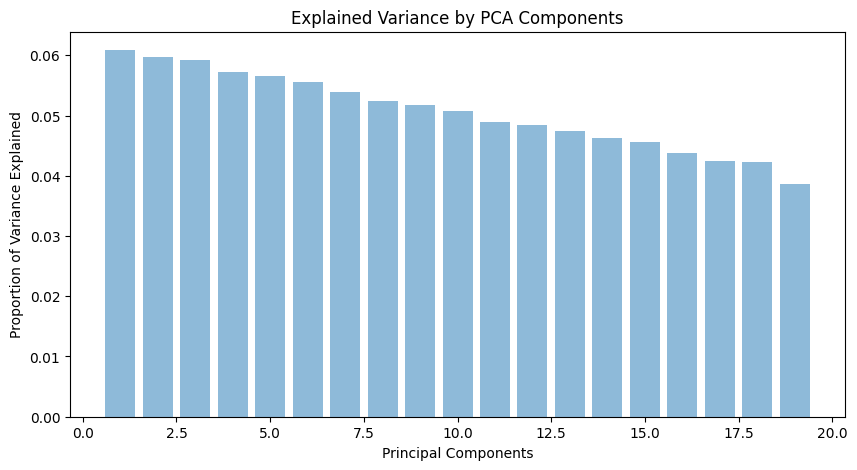

In [29]:
import matplotlib.pyplot as plt

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Explained Variance by PCA Components')
plt.show()

With the PCA components, we can perform further analysis or visualization. For instance, we can plot the projections of the data onto the first three principal components to see if there are any noticeable patterns or clusters

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


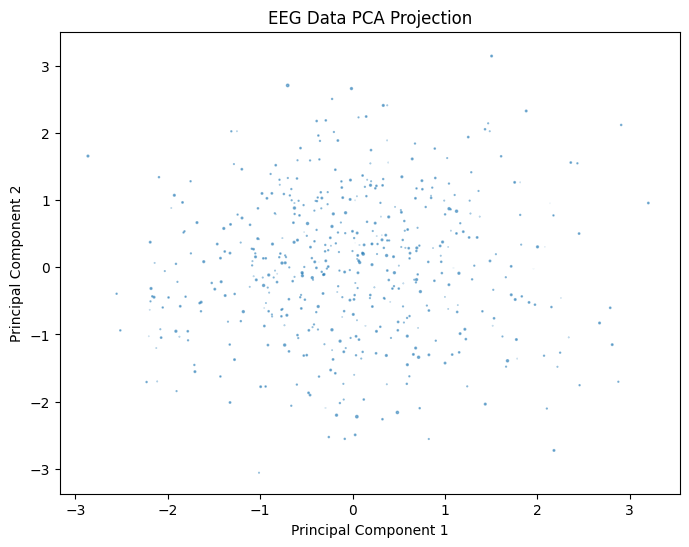

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(eeg_pca[:, 0], eeg_pca[:, 1],eeg_pca[:, 2], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('EEG Data PCA Projection')
plt.show()